
# OCEAN HEALTH INDEX: A DECADE OF PROGRESS, THEN THE CLIFF

link  https://www.kaggle.com/datasets/umitka/ocean-health-index

WHAT IS THIS?
-------------
The Ocean Health Index (OHI) measures how well countries are managing
their ocean ecosystems. Scores range from 0-100, covering 10 goals:
biodiversity, clean waters, food provision, coastal protection, etc.

This dataset tracks 193 countries from 2012 to 2024.


WHAT WE'LL EXPLORE:
-------------------
1. Global trend: How has ocean health changed over 13 years?
2. Winners and losers: Who improved? Who collapsed?
3. The 2023 mystery: Why did everything fall off a cliff?
4. Regional patterns: Did geography matter?
5. Predictions: What does 2025 look like?


SPOILER ALERT:
--------------
Something broke in 2023. A decade of slow progress got wiped out in
one year. 163 countries declined. Only 30 improved.

This notebook tells that story.


DATA SOURCE:
------------
Ocean Health Index (ohi-science.org)
194 rows x 15 columns (REF_AREA, REF_AREA_LABEL, 2012-2024 scores)


**Rekhi**  
[Kaggle](https://kaggle.com/seki32) | [GitHub](https://github.com/Rekhii)


## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import kagglehub
import os
import warnings
warnings.filterwarnings('ignore')

## Load The Data


In [3]:
# Download latest version
path = kagglehub.dataset_download("umitka/ocean-health-index")

print("Path to dataset files:", path)

100%|██████████| 8.13k/8.13k [00:00<00:00, 6.29MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/umitka/ocean-health-index/versions/1


In [4]:
print(os.listdir(path))

['ocean_health_index.csv']


In [5]:
df = pd.read_csv(os.path.join(path,'ocean_health_index.csv'))

## Explore The Data


In [6]:
print(f"Shape: {df.shape}")
print(f"Countries/Territories: {df.shape[0]}")
print(f"Years covered: 2012-2024 ({df.shape[1]-2} years)")
df.head()

Shape: (194, 15)
Countries/Territories: 194
Years covered: 2012-2024 (13 years)


,REF_AREA,REF_AREA_LABEL,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,ABW,Aruba,70.79,70.10,70.09,70.52,71.28,72.14,77.65,80.87,79.94,79.39,76.43,64.90,67.50
1,AGO,Angola,63.33,64.57,64.57,67.00,67.66,66.70,65.71,61.90,59.76,59.23,59.41,57.91,57.89
2,AIA,Anguilla,72.17,70.60,70.82,70.86,70.74,70.21,70.36,70.30,70.36,70.35,70.44,70.63,70.87
3,ALB,Albania,62.95,63.27,63.86,66.55,66.16,66.70,67.38,67.52,71.79,71.70,71.19,65.38,69.68
4,ANT,Netherlands Antilles,74.66,74.98,74.97,74.92,77.45,77.45,77.44,77.44,76.61,76.51,76.33,76.35,76.34


In [7]:
# Check for missing values and basic stats
print("Missing values per column:")
print(df.isnull().sum().sum())

print("\n" + "="*50)
print("\nScore range across all years:")
year_cols = [str(y) for y in range(2012, 2025)]
all_scores = df[year_cols].values.flatten()
print(f"Min: {np.nanmin(all_scores):.2f}")
print(f"Max: {np.nanmax(all_scores):.2f}")
print(f"Mean: {np.nanmean(all_scores):.2f}")
print(f"Std: {np.nanstd(all_scores):.2f}")

Missing values per column:
0


Score range across all years:
Min: 46.87
Max: 86.92
Mean: 70.09
Std: 6.37


## The World's Ocean Health Trajectory

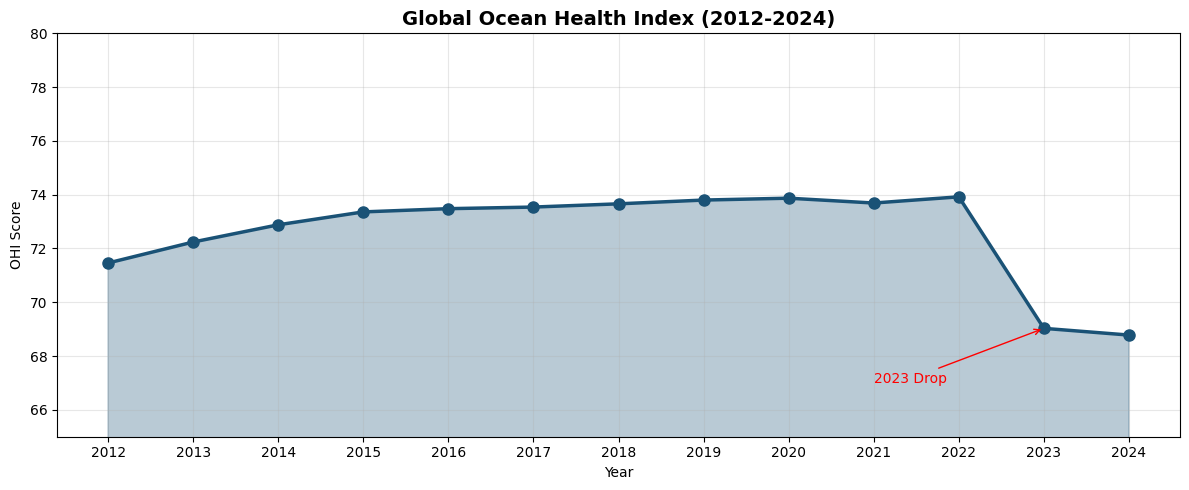

2012 Score: 71.46
2022 Score: 73.92
2023 Score: 69.03
2024 Score: 68.78


In [8]:
# Extract the World average row
world = df[df['REF_AREA'] == 'WLD']
year_cols = [str(y) for y in range(2012, 2025)]

# Plot global trend
plt.figure(figsize=(12, 5))
plt.plot(year_cols, world[year_cols].values[0], 'o-', linewidth=2.5, markersize=8, color='#1a5276')
plt.fill_between(year_cols, world[year_cols].values[0], alpha=0.3, color='#1a5276')

plt.title("Global Ocean Health Index (2012-2024)", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("OHI Score")
plt.ylim(65, 80)
plt.grid(True, alpha=0.3)

# Annotate the drop
plt.annotate('2023 Drop', xy=('2023', 69.03), xytext=('2021', 67),
            arrowprops=dict(arrowstyle='->', color='red'), fontsize=10, color='red')

plt.tight_layout()
plt.show()

print(f"2012 Score: {world['2012'].values[0]}")
print(f"2022 Score: {world['2022'].values[0]}")
print(f"2023 Score: {world['2023'].values[0]}")
print(f"2024 Score: {world['2024'].values[0]}")

Ocean health was slowly climbing from 71.46 (2012) → 73.92 (2022), then crashed nearly 5 points in one year to 69.03 (2023). Still down in 2024.
A decade of progress wiped out in 12 months. That's the hook.

## Who Crashed the Hardest

In [10]:
# Calculate change from 2022 to 2023 for each country
df_analysis = df[df['REF_AREA'] != 'WLD'].copy()  # Exclude world average
df_analysis['crash_2023'] = df_analysis['2023'] - df_analysis['2022']

# Top 10 biggest drops
biggest_drops = df_analysis.nsmallest(10, 'crash_2023')[['REF_AREA_LABEL', '2022', '2023', 'crash_2023']]
biggest_drops.columns = ['Country', '2022 Score', '2023 Score', 'Change']

print("Top 10 Biggest Drops (2022 → 2023):\n")
print(biggest_drops.to_string(index=False))

print("\n" + "="*50)

# Any countries that actually improved?
improved = df_analysis[df_analysis['crash_2023'] > 0]
print(f"\nCountries that IMPROVED in 2023: {len(improved)} out of {len(df_analysis)}")

Top 10 Biggest Drops (2022 → 2023):

               Country  2022 Score  2023 Score  Change
                 Aruba       76.43       64.90  -11.53
                 Tonga       78.36       68.90   -9.46
Bosnia and Herzegovina       68.92       59.54   -9.38
            Montenegro       62.83       53.88   -8.95
                 Samoa       74.99       66.15   -8.84
               Bermuda       69.94       61.15   -8.79
            Madagascar       69.48       60.72   -8.76
              Malaysia       69.13       60.44   -8.69
                Norway       77.86       69.18   -8.68
             Singapore       64.92       56.25   -8.67


Countries that IMPROVED in 2023: 30 out of 193


Aruba got obliterated — dropped 11.5 points in one year. Tonga, Bosnia, Montenegro all got wrecked too.
Only 30 countries improved while 163 got hit. That's a global event, not random noise.

## The Survivors (Who Actually Got Better?)

In [14]:
# The 30 survivors — who thrived while the world burned?
survivors = df_analysis.nlargest(10, 'crash_2023')[['REF_AREA_LABEL', '2022', '2023', 'crash_2023']]

print("=" * 55)
print("THE SURVIVORS — TOP 10 WHO SAID 'NOT TODAY' ")
print("=" * 55)

for i, row in survivors.iterrows():
    country = row['REF_AREA_LABEL']
    before = row['2022']
    after = row['2023']
    gain = row['crash_2023']
    print(f"{country}: {before:.1f} → {after:.1f} (+{gain:.1f}) ")

print("\n" + "=" * 55)
print(f"\n163 countries fell. These 30 said no.")
print(f"Average drop for losers: {df_analysis[df_analysis['crash_2023'] < 0]['crash_2023'].mean():.2f}")
print(f"Average gain for winners: {df_analysis[df_analysis['crash_2023'] > 0]['crash_2023'].mean():.2f}")

THE SURVIVORS — TOP 10 WHO SAID 'NOT TODAY' 
Ecuador: 79.6 → 80.4 (+0.8) 
Bouvet Island: 71.5 → 72.0 (+0.5) 
Falkland Islands: 57.2 → 57.7 (+0.5) 
Greenland: 81.8 → 82.1 (+0.3) 
Micronesia, Fed. Sts.: 62.0 → 62.3 (+0.3) 
Liberia: 73.2 → 73.5 (+0.3) 
Romania: 72.4 → 72.6 (+0.2) 
Ascension Island: 76.0 → 76.2 (+0.2) 
Heard Island and McDonald Islands: 73.1 → 73.3 (+0.2) 
Cote d'Ivoire: 54.6 → 54.8 (+0.2) 


163 countries fell. These 30 said no.
Average drop for losers: -5.85
Average gain for winners: 0.17


The asymmetry is brutal. Losers dropped 5.85 points on average, winners barely gained 0.17. This wasn't a rebalancing — it was a global wipeout where even the "winners" just didn't lose.Ecuador, Greenland, and some remote islands barely held on. Everyone else got smoked.

## The Long Game: Who Won the Decade?

In [15]:
# 2012 vs 2024 — the full journey
df_analysis['decade_change'] = df_analysis['2024'] - df_analysis['2012']

print("=" * 60)
print("THE LONG GAME: 2012 vs 2024 -- WHO WON THE DECADE?")
print("=" * 60)

# Biggest winners over 12 years
decade_winners = df_analysis.nlargest(10, 'decade_change')[['REF_AREA_LABEL', '2012', '2024', 'decade_change']]
print("\nBIGGEST CLIMBERS (12 years):\n")
for i, row in decade_winners.iterrows():
    print(f"{row['REF_AREA_LABEL']}: {row['2012']:.1f} -> {row['2024']:.1f} (+{row['decade_change']:.1f})")

print("\n" + "-" * 60)

# Biggest losers over 12 years
decade_losers = df_analysis.nsmallest(10, 'decade_change')[['REF_AREA_LABEL', '2012', '2024', 'decade_change']]
print("\nBIGGEST FALLERS (12 years):\n")
for i, row in decade_losers.iterrows():
    print(f"{row['REF_AREA_LABEL']}: {row['2012']:.1f} -> {row['2024']:.1f} ({row['decade_change']:.1f})")

# Overall stats
print("\n" + "=" * 60)
improved_decade = len(df_analysis[df_analysis['decade_change'] > 0])
print(f"\nCountries better off than 2012: {improved_decade}/{len(df_analysis)}")
print(f"Countries worse off: {len(df_analysis) - improved_decade}/{len(df_analysis)}")

THE LONG GAME: 2012 vs 2024 -- WHO WON THE DECADE?

BIGGEST CLIMBERS (12 years):

South Georgia and the South Sandwich Islands: 52.5 -> 66.7 (+14.2)
Norfolk Island (Aus.): 68.0 -> 78.4 (+10.4)
Ecuador: 70.9 -> 80.1 (+9.1)
Pitcairn: 63.3 -> 71.5 (+8.1)
Albania: 63.0 -> 69.7 (+6.7)
Comoros: 70.7 -> 76.0 (+5.2)
Nauru: 70.5 -> 75.6 (+5.1)
Djibouti: 69.3 -> 74.2 (+4.9)
Maldives: 64.2 -> 69.1 (+4.8)
Japan: 66.3 -> 70.9 (+4.5)

------------------------------------------------------------

BIGGEST FALLERS (12 years):

Canada: 77.2 -> 63.8 (-13.4)
Marshall Islands: 81.6 -> 68.4 (-13.2)
Vanuatu: 69.9 -> 58.3 (-11.6)
Eritrea: 66.0 -> 55.1 (-10.9)
American Samoa: 75.1 -> 64.4 (-10.7)
New Caledonia: 72.6 -> 61.9 (-10.7)
Ukraine: 68.5 -> 58.4 (-10.1)
Fiji: 71.9 -> 62.4 (-9.5)
Finland: 78.3 -> 69.0 (-9.2)
Malaysia: 69.4 -> 60.2 (-9.2)


Countries better off than 2012: 55/193
Countries worse off: 138/193


Canada fell 13 points. From 77 to 63. One of the worst declines globally.
Only 55 countries improved over 12 years. 138 got worse. The ocean is losing.
South Georgia went from worst to decent (+14.2), while rich countries like Canada, Finland, and New Caledonia collapsed. That's a plot twist.

## Visualizing the Carnage

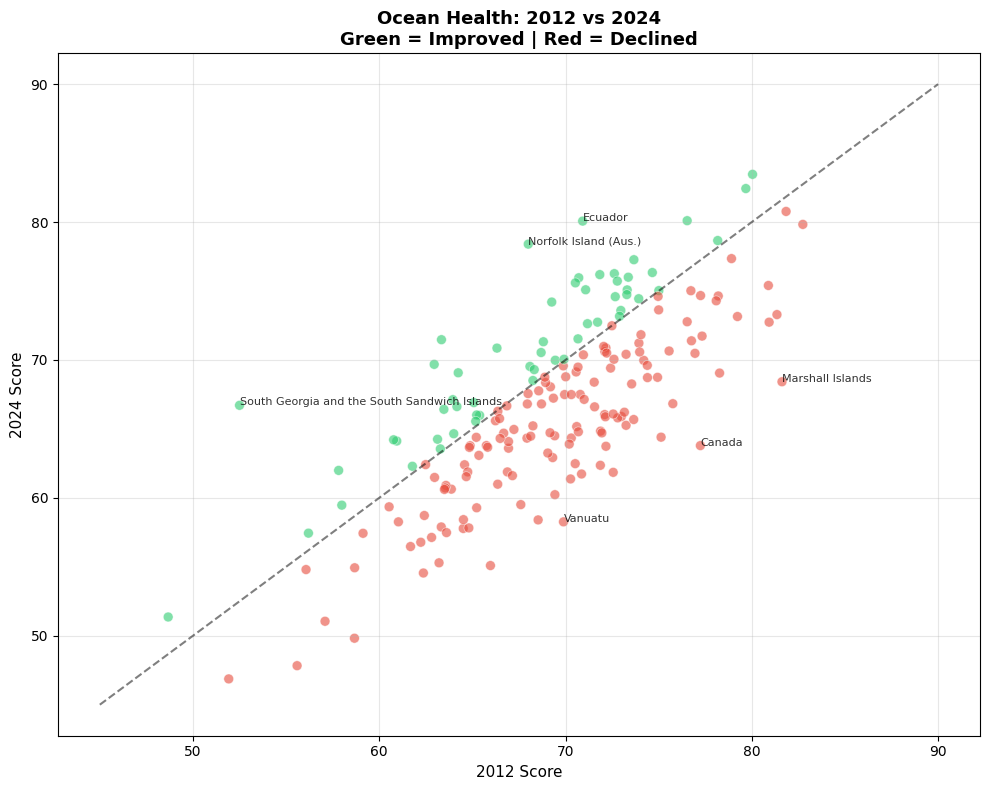

Above the line = got better. Below = got worse.
Most of the world is below the line.


In [16]:
# Scatter plot: Where you started vs where you ended
fig, ax = plt.subplots(figsize=(10, 8))

colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in df_analysis['decade_change']]
scatter = ax.scatter(df_analysis['2012'], df_analysis['2024'],
                     c=colors, alpha=0.6, s=50, edgecolors='white', linewidth=0.5)

# Diagonal line — "no change"
ax.plot([45, 90], [45, 90], 'k--', alpha=0.5, label='No Change Line')

# Labels for extreme cases
extremes = df_analysis.nlargest(3, 'decade_change')['REF_AREA_LABEL'].tolist() + \
           df_analysis.nsmallest(3, 'decade_change')['REF_AREA_LABEL'].tolist()

for idx, row in df_analysis.iterrows():
    if row['REF_AREA_LABEL'] in extremes:
        ax.annotate(row['REF_AREA_LABEL'], (row['2012'], row['2024']),
                   fontsize=8, alpha=0.8)

ax.set_xlabel('2012 Score', fontsize=11)
ax.set_ylabel('2024 Score', fontsize=11)
ax.set_title('Ocean Health: 2012 vs 2024\nGreen = Improved | Red = Declined', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Above the line = got better. Below = got worse.")
print("Most of the world is below the line.")

The visual tells the whole story — sea of red below the line, Canada and Marshall Islands falling off a cliff from their high starting points. Ecuador and Norfolk Island are the outliers going up.

## The Heatmap: Every Country, Every Year

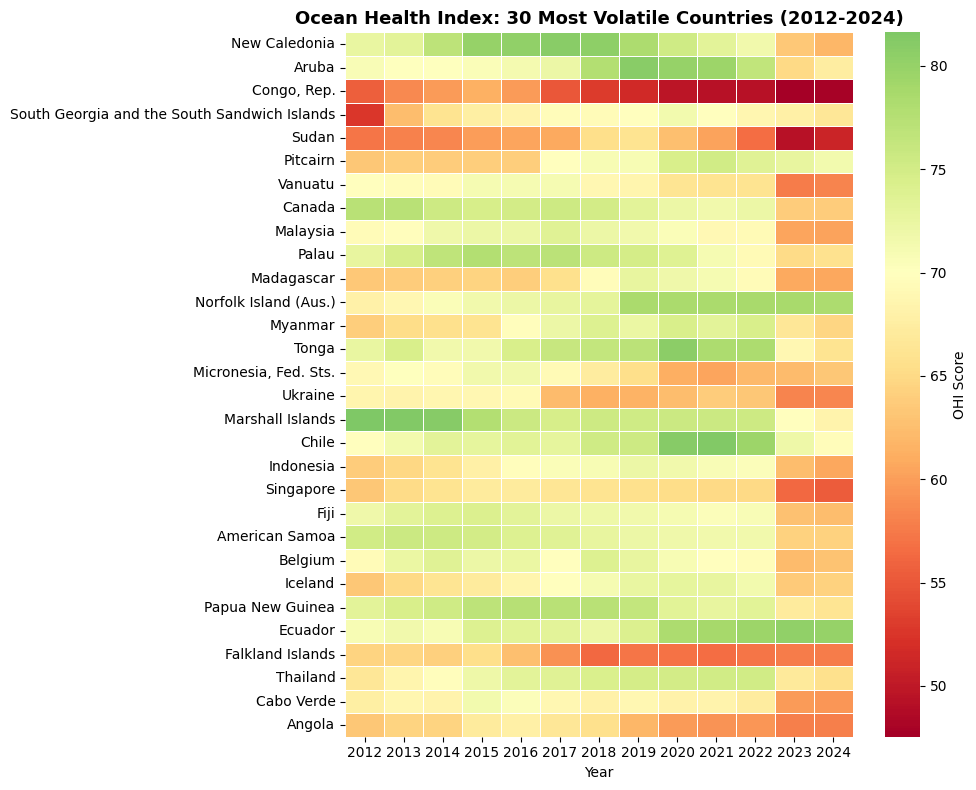

Green = healthy oceans. Red = struggling.
Watch how colors shift over time — that's the story.


In [18]:
# Prepare data for heatmap — top 30 most volatile countries
df_analysis['volatility'] = df_analysis[year_cols].std(axis=1)
top_volatile = df_analysis.nlargest(30, 'volatility')

# Create heatmap data
heatmap_data = top_volatile.set_index('REF_AREA_LABEL')[year_cols].astype(float)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='RdYlGn', center=70,
            annot=False, fmt='.0f', linewidths=0.5,
            cbar_kws={'label': 'OHI Score'}, ax=ax)

ax.set_title('Ocean Health Index: 30 Most Volatile Countries (2012-2024)',
             fontsize=13, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('')

plt.tight_layout()
plt.show()

print("Green = healthy oceans. Red = struggling.")
print("Watch how colors shift over time — that's the story.")

## Regional Breakdown: Who's Winning by Geography?

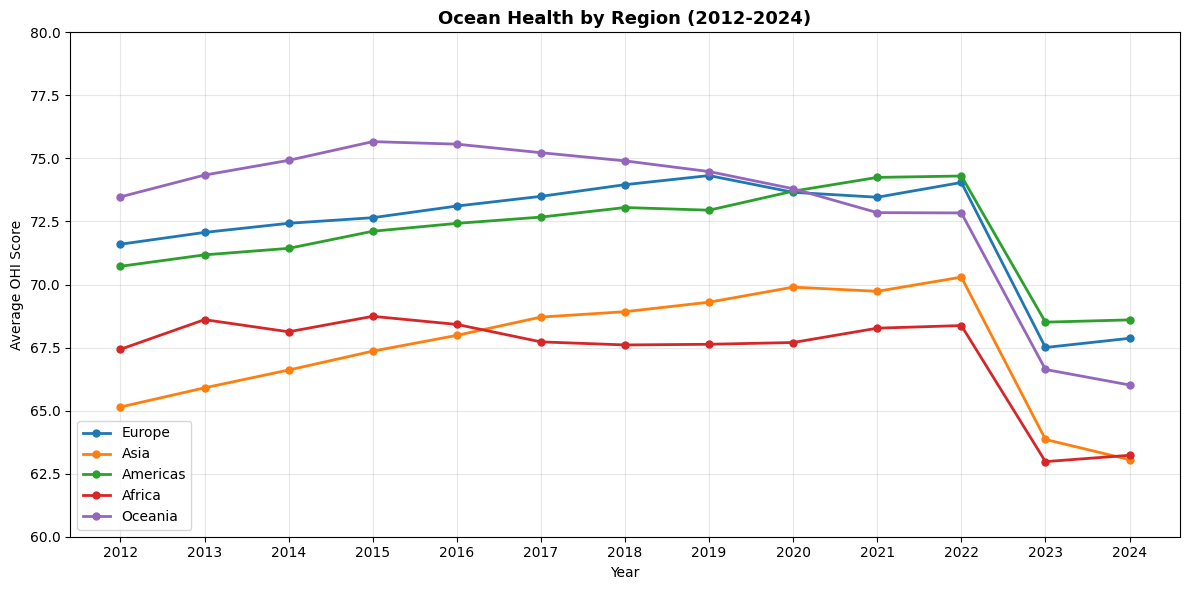


2023 DAMAGE REPORT BY REGION:
----------------------------------------
Europe: -6.54
Asia: -6.44
Americas: -5.80
Africa: -5.39
Oceania: -6.21


In [19]:
# Manually define regions (simplified)
regions = {
    'Europe': ['NOR', 'SWE', 'FIN', 'DNK', 'DEU', 'GBR', 'FRA', 'ESP', 'PRT', 'ITA', 'GRC', 'NLD', 'BEL', 'IRL', 'POL', 'ROU', 'BGR', 'HRV', 'SVN', 'EST', 'LVA', 'LTU', 'UKR', 'RUS'],
    'Asia': ['CHN', 'JPN', 'KOR', 'IND', 'IDN', 'THA', 'VNM', 'MYS', 'PHL', 'SGP', 'BGD', 'PAK', 'MMR', 'KHM', 'TWN'],
    'Americas': ['USA', 'CAN', 'MEX', 'BRA', 'ARG', 'CHL', 'COL', 'PER', 'VEN', 'ECU', 'CUB', 'DOM', 'PAN', 'CRI', 'GTM', 'HND', 'NIC', 'SLV'],
    'Africa': ['ZAF', 'EGY', 'NGA', 'KEN', 'TZA', 'GHA', 'MAR', 'DZA', 'TUN', 'SEN', 'CIV', 'CMR', 'AGO', 'MOZ', 'MDG', 'NAM'],
    'Oceania': ['AUS', 'NZL', 'FJI', 'PNG', 'WSM', 'TON', 'VUT', 'SLB', 'PLW', 'FSM', 'MHL', 'NCL']
}

# Calculate regional averages per year
regional_data = {}
for region, codes in regions.items():
    region_df = df_analysis[df_analysis['REF_AREA'].isin(codes)]
    regional_data[region] = region_df[year_cols].mean()

regional_df = pd.DataFrame(regional_data).T

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
for region in regional_df.index:
    ax.plot(year_cols, regional_df.loc[region], 'o-', label=region, linewidth=2, markersize=5)

ax.set_title('Ocean Health by Region (2012-2024)', fontsize=13, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Average OHI Score')
ax.legend(loc='lower left')
ax.grid(True, alpha=0.3)
ax.set_ylim(60, 80)

plt.tight_layout()
plt.show()

# The 2023 damage by region
print("\n2023 DAMAGE REPORT BY REGION:")
print("-" * 40)
for region in regional_df.index:
    drop = regional_df.loc[region, '2023'] - regional_df.loc[region, '2022']
    print(f"{region}: {drop:+.2f}")

Everyone got wrecked. No region escaped.Europe and Asia took the worst hit (-6.5), but even Africa — the "best" performer — still dropped 5.4 points. This was a global synchronized collapse, not a regional problem.

## The Mystery: What Happened in 2023?

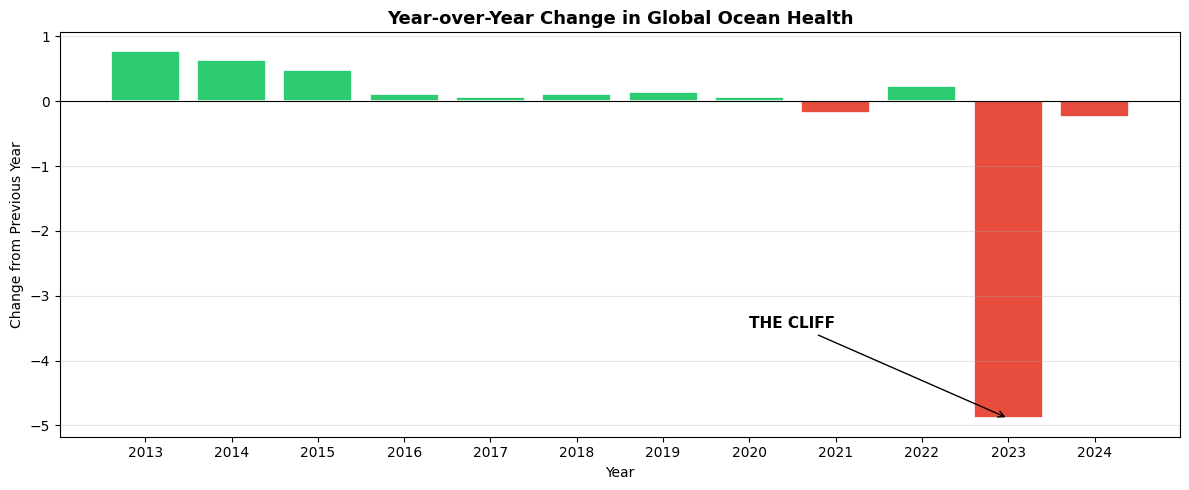


Year-over-Year Changes:
------------------------------
2012 -> 2013: +0.78
2013 -> 2014: +0.64
2014 -> 2015: +0.48
2015 -> 2016: +0.12
2016 -> 2017: +0.06
2017 -> 2018: +0.12
2018 -> 2019: +0.14
2019 -> 2020: +0.07
2020 -> 2021: -0.18
2021 -> 2022: +0.23
2022 -> 2023: -4.89
2023 -> 2024: -0.25


In [20]:
# Year-over-year changes for the world
world_scores = df[df['REF_AREA'] == 'WLD'][year_cols].values[0]
yoy_changes = []

for i in range(1, len(year_cols)):
    change = world_scores[i] - world_scores[i-1]
    yoy_changes.append(change)

# Plot YoY changes
fig, ax = plt.subplots(figsize=(12, 5))
colors = ['#2ecc71' if x >= 0 else '#e74c3c' for x in yoy_changes]
bars = ax.bar(year_cols[1:], yoy_changes, color=colors, edgecolor='white', linewidth=1.2)

ax.axhline(y=0, color='black', linewidth=0.8)
ax.set_title('Year-over-Year Change in Global Ocean Health', fontsize=13, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Change from Previous Year')
ax.grid(True, alpha=0.3, axis='y')

# Highlight the 2023 disaster
ax.annotate('THE CLIFF', xy=('2023', -4.89), xytext=('2020', -3.5),
            arrowprops=dict(arrowstyle='->', color='black'),
            fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nYear-over-Year Changes:")
print("-" * 30)
for i, yr in enumerate(year_cols[1:]):
    print(f"{year_cols[i]} -> {yr}: {yoy_changes[i]:+.2f}")

There it is. 10 years of slow, steady improvement — small gains every year. Then 2023 hits and -4.89 in one shot. That's 25x worse than any previous decline.The cliff is real. Something broke in 2023.

## Correlation: Did Everyone Fall Together?

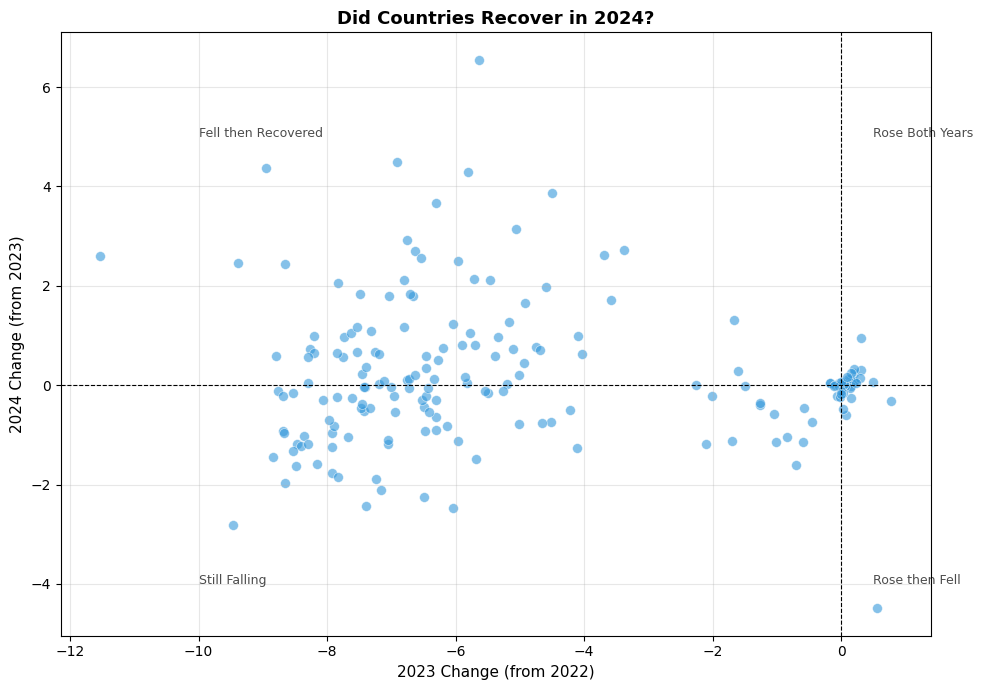


Countries that fell in 2023 and recovered in 2024: 78
Countries that fell in 2023 and KEPT falling in 2024: 80


In [21]:
# Calculate year-over-year change for each country in 2023
df_analysis['change_2023'] = df_analysis['2023'] - df_analysis['2022']
df_analysis['change_2024'] = df_analysis['2024'] - df_analysis['2023']

# Did countries that fell hard in 2023 recover in 2024?
fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(df_analysis['change_2023'], df_analysis['change_2024'],
          alpha=0.6, s=50, c='#3498db', edgecolors='white', linewidth=0.5)

ax.axhline(y=0, color='black', linewidth=0.8, linestyle='--')
ax.axvline(x=0, color='black', linewidth=0.8, linestyle='--')

ax.set_xlabel('2023 Change (from 2022)', fontsize=11)
ax.set_ylabel('2024 Change (from 2023)', fontsize=11)
ax.set_title('Did Countries Recover in 2024?', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)

# Quadrant labels
ax.text(-10, 5, 'Fell then Recovered', fontsize=9, alpha=0.7)
ax.text(0.5, 5, 'Rose Both Years', fontsize=9, alpha=0.7)
ax.text(-10, -4, 'Still Falling', fontsize=9, alpha=0.7)
ax.text(0.5, -4, 'Rose then Fell', fontsize=9, alpha=0.7)

plt.tight_layout()
plt.show()

# Stats
recovered = len(df_analysis[(df_analysis['change_2023'] < 0) & (df_analysis['change_2024'] > 0)])
still_falling = len(df_analysis[(df_analysis['change_2023'] < 0) & (df_analysis['change_2024'] < 0)])
print(f"\nCountries that fell in 2023 and recovered in 2024: {recovered}")
print(f"Countries that fell in 2023 and KEPT falling in 2024: {still_falling}")

Split right down the middle. 78 bounced back, 80 kept sinking. No clear recovery pattern — it's a coin flip.


The 2023 crash wasn't a one-time shock that corrected itself. For half the world, the bleeding continued.

## The Stable Ones: Who Never Flinched?

In [22]:
# Find countries with lowest volatility — the steady hands
df_analysis['volatility'] = df_analysis[year_cols].std(axis=1)

# Most stable countries
most_stable = df_analysis.nsmallest(10, 'volatility')[['REF_AREA_LABEL', '2012', '2024', 'volatility', 'decade_change']]

print("=" * 65)
print("THE ROCKS: MOST STABLE OCEAN HEALTH (2012-2024)")
print("=" * 65)
print("These countries barely moved. Consistency kings.\n")

for i, row in most_stable.iterrows():
    direction = "flat" if abs(row['decade_change']) < 1 else ("up" if row['decade_change'] > 0 else "down")
    print(f"{row['REF_AREA_LABEL']}: {row['2012']:.1f} -> {row['2024']:.1f} | std: {row['volatility']:.2f} | trend: {direction}")

print("\n" + "-" * 65)

# Most chaotic
most_chaotic = df_analysis.nlargest(10, 'volatility')[['REF_AREA_LABEL', '2012', '2024', 'volatility', 'decade_change']]

print("\nTHE ROLLER COASTERS: MOST VOLATILE OCEAN HEALTH")
print("-" * 65)
print("Wild swings every year. Chaos.\n")

for i, row in most_chaotic.iterrows():
    direction = "UP" if row['decade_change'] > 0 else "DOWN"
    print(f"{row['REF_AREA_LABEL']}: {row['2012']:.1f} -> {row['2024']:.1f} | std: {row['volatility']:.2f} | net: {direction} {abs(row['decade_change']):.1f}")

THE ROCKS: MOST STABLE OCEAN HEALTH (2012-2024)
These countries barely moved. Consistency kings.

French Guiana: 73.9 -> 74.4 | std: 0.16 | trend: flat
Australia: 75.0 -> 75.0 | std: 0.22 | trend: flat
Faroe Islands: 65.2 -> 66.0 | std: 0.25 | trend: flat
Taiwan, China: 68.9 -> 68.8 | std: 0.28 | trend: flat
Montserrat: 71.0 -> 70.4 | std: 0.35 | trend: flat
Guernsey: 65.2 -> 65.5 | std: 0.40 | trend: flat
Bonaire (Neth.): 78.2 -> 78.7 | std: 0.44 | trend: flat
Christmas Island: 69.9 -> 70.0 | std: 0.44 | trend: flat
Jersey: 72.5 -> 72.5 | std: 0.45 | trend: flat
Algeria: 66.2 -> 65.6 | std: 0.47 | trend: flat

-----------------------------------------------------------------

THE ROLLER COASTERS: MOST VOLATILE OCEAN HEALTH
-----------------------------------------------------------------
Wild swings every year. Chaos.

New Caledonia: 72.6 -> 61.9 | std: 6.21 | net: DOWN 10.7
Aruba: 70.8 -> 67.5 | std: 5.09 | net: DOWN 3.3
Congo, Rep.: 55.6 -> 47.8 | std: 4.95 | net: DOWN 7.8
South Geo

Australia — std of 0.22 over 13 years. Absolute rock. Started at 75, ended at 75. Didn't care about global trends.Meanwhile New Caledonia (std 6.21) is a rollercoaster that crashed. Canada too — volatile AND ended down 13 points.The pattern: stability correlates with mediocre scores. Chaos usually ends badly.

## Now the Fun Part: Predicting 2025

In [23]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

# Prepare data for forecasting
years_numeric = np.array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]).reshape(-1, 1)
year_2025 = np.array([[2025]])

predictions_2025 = []

for idx, row in df_analysis.iterrows():
    scores = row[year_cols].values.astype(float)

    # Simple linear regression
    model = LinearRegression()
    model.fit(years_numeric, scores)
    pred = model.predict(year_2025)[0]

    predictions_2025.append({
        'REF_AREA': row['REF_AREA'],
        'Country': row['REF_AREA_LABEL'],
        '2024_actual': row['2024'],
        '2025_predicted': pred,
        'predicted_change': pred - row['2024']
    })

pred_df = pd.DataFrame(predictions_2025)

print("=" * 65)
print("2025 PREDICTIONS: WHO'S GOING UP, WHO'S GOING DOWN")
print("=" * 65)

print("\nPREDICTED TO RISE:\n")
risers = pred_df.nlargest(10, 'predicted_change')
for i, row in risers.iterrows():
    print(f"{row['Country']}: {row['2024_actual']:.1f} -> {row['2025_predicted']:.1f} ({row['predicted_change']:+.1f})")

print("\n" + "-" * 65)

print("\nPREDICTED TO FALL:\n")
fallers = pred_df.nsmallest(10, 'predicted_change')
for i, row in fallers.iterrows():
    print(f"{row['Country']}: {row['2024_actual']:.1f} -> {row['2025_predicted']:.1f} ({row['predicted_change']:+.1f})")

2025 PREDICTIONS: WHO'S GOING UP, WHO'S GOING DOWN

PREDICTED TO RISE:

Tonga: 66.1 -> 74.1 (+8.0)
Myanmar: 64.7 -> 72.4 (+7.7)
Chile: 69.6 -> 77.1 (+7.6)
Indonesia: 60.6 -> 67.8 (+7.2)
Aruba: 67.5 -> 74.4 (+6.9)
Madagascar: 60.6 -> 67.5 (+6.9)
Thailand: 65.8 -> 72.5 (+6.8)
New Caledonia: 61.9 -> 68.0 (+6.2)
Iceland: 64.2 -> 70.2 (+6.0)
Cayman Islands: 62.5 -> 68.4 (+5.9)

-----------------------------------------------------------------

PREDICTED TO FALL:

Falkland Islands: 57.8 -> 54.5 (-3.3)
Micronesia, Fed. Sts.: 63.2 -> 60.2 (-3.1)
Congo, Rep.: 47.8 -> 45.8 (-2.0)
Curacao: 67.8 -> 66.0 (-1.7)
Cote d'Ivoire: 54.9 -> 53.2 (-1.7)
Eritrea: 55.1 -> 53.6 (-1.5)
Liberia: 73.6 -> 72.2 (-1.4)
Egypt, Arab Rep.: 65.9 -> 64.8 (-1.1)
Yemen, Rep.: 64.8 -> 63.7 (-1.1)
Mauritania: 70.4 -> 69.4 (-1.0)


Linear regression says Tonga and Myanmar bounce back hard (+8, +7.7), while Falkland Islands and Micronesia keep sinking.But wait — linear regression on this data is naive. It doesn't capture that 2023 cliff. Let's get smarter.

## Smarter Model: Recent Trend vs Long Trend

In [24]:
# Compare two approaches:
# 1. Full trend (2012-2024) — long view
# 2. Recent trend (2020-2024) — captures the crash

years_full = np.array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]).reshape(-1, 1)
years_recent = np.array([2020, 2021, 2022, 2023, 2024]).reshape(-1, 1)
recent_cols = ['2020', '2021', '2022', '2023', '2024']

predictions_comparison = []

for idx, row in df_analysis.iterrows():
    scores_full = row[year_cols].values.astype(float)
    scores_recent = row[recent_cols].values.astype(float)

    # Full trend model
    model_full = LinearRegression()
    model_full.fit(years_full, scores_full)
    pred_full = model_full.predict([[2025]])[0]

    # Recent trend model
    model_recent = LinearRegression()
    model_recent.fit(years_recent, scores_recent)
    pred_recent = model_recent.predict([[2025]])[0]

    predictions_comparison.append({
        'Country': row['REF_AREA_LABEL'],
        '2024_actual': row['2024'],
        'pred_full_trend': pred_full,
        'pred_recent_trend': pred_recent,
        'gap': pred_full - pred_recent  # positive = full is more optimistic
    })

comp_df = pd.DataFrame(predictions_comparison)

print("=" * 70)
print("OPTIMIST vs PESSIMIST: FULL TREND vs RECENT TREND")
print("=" * 70)
print("\nBiggest disagreements (Full trend way more optimistic):\n")

optimist_gap = comp_df.nlargest(10, 'gap')
for i, row in optimist_gap.iterrows():
    print(f"{row['Country']}: Full says {row['pred_full_trend']:.1f} | Recent says {row['pred_recent_trend']:.1f} | Gap: {row['gap']:.1f}")

print("\n" + "-" * 70)
print("\nWhere recent trend is MORE optimistic (recovery signal?):\n")

pessimist_gap = comp_df.nsmallest(5, 'gap')
for i, row in pessimist_gap.iterrows():
    print(f"{row['Country']}: Full says {row['pred_full_trend']:.1f} | Recent says {row['pred_recent_trend']:.1f} | Gap: {row['gap']:.1f}")

OPTIMIST vs PESSIMIST: FULL TREND vs RECENT TREND

Biggest disagreements (Full trend way more optimistic):

Aruba: Full says 74.4 | Recent says 61.8 | Gap: 12.6
Tonga: Full says 74.1 | Recent says 62.9 | Gap: 11.3
Madagascar: Full says 67.5 | Recent says 56.9 | Gap: 10.6
Sudan: Full says 56.0 | Recent says 45.7 | Gap: 10.2
Chile: Full says 77.1 | Recent says 67.0 | Gap: 10.1
New Caledonia: Full says 68.0 | Recent says 58.1 | Gap: 9.9
Indonesia: Full says 67.8 | Recent says 58.0 | Gap: 9.8
Myanmar: Full says 72.4 | Recent says 62.7 | Gap: 9.6
Iceland: Full says 70.2 | Recent says 61.1 | Gap: 9.2
Thailand: Full says 72.5 | Recent says 63.6 | Gap: 8.9

----------------------------------------------------------------------

Where recent trend is MORE optimistic (recovery signal?):

Falkland Islands: Full says 54.5 | Recent says 58.1 | Gap: -3.6
Micronesia, Fed. Sts.: Full says 60.2 | Recent says 63.6 | Gap: -3.4
Nauru: Full says 74.8 | Recent says 77.8 | Gap: -3.0
Liberia: Full says 72.2 |

This is the insight. Aruba's gap is 12.6 points — the full trend thinks recovery, the recent trend says "nah, you're cooked."Full trend is living in the past. Recent trend saw the massacre and adjusted. The truth is probably somewhere in between.Falkland Islands and Micronesia are the opposite — recent trend says they're stabilizing, full trend still thinks they're doomed.

## Ensemble: Blend Both Models

In [25]:
# Weighted ensemble: 40% full trend, 60% recent trend
# (Recent gets more weight because 2023 changed everything)

comp_df['pred_ensemble'] = 0.4 * comp_df['pred_full_trend'] + 0.6 * comp_df['pred_recent_trend']
comp_df['ensemble_change'] = comp_df['pred_ensemble'] - comp_df['2024_actual']

print("=" * 70)
print("FINAL 2025 PREDICTIONS (ENSEMBLE MODEL)")
print("40% Long-term trend + 60% Recent trend")
print("=" * 70)

print("\nTOP 10 PREDICTED RISERS:\n")
risers = comp_df.nlargest(10, 'ensemble_change')
for i, row in risers.iterrows():
    print(f"{row['Country']}: {row['2024_actual']:.1f} -> {row['pred_ensemble']:.1f} ({row['ensemble_change']:+.1f})")

print("\n" + "-" * 70)

print("\nTOP 10 PREDICTED FALLERS:\n")
fallers = comp_df.nsmallest(10, 'ensemble_change')
for i, row in fallers.iterrows():
    print(f"{row['Country']}: {row['2024_actual']:.1f} -> {row['pred_ensemble']:.1f} ({row['ensemble_change']:+.1f})")

print("\n" + "-" * 70)

# Global prediction
world_2024 = df[df['REF_AREA'] == 'WLD']['2024'].values[0]
world_recent = df[df['REF_AREA'] == 'WLD'][recent_cols].values[0]
model_world = LinearRegression()
model_world.fit(years_recent, world_recent)
world_2025_pred = model_world.predict([[2025]])[0]

print(f"\nGLOBAL 2025 PREDICTION: {world_2024:.2f} -> {world_2025_pred:.2f}")
print("The world keeps falling. Slowly.")

FINAL 2025 PREDICTIONS (ENSEMBLE MODEL)
40% Long-term trend + 60% Recent trend

TOP 10 PREDICTED RISERS:

Bouvet Island: 67.6 -> 70.3 (+2.8)
Argentina: 66.0 -> 68.2 (+2.2)
Myanmar: 64.7 -> 66.6 (+1.9)
Nicaragua: 70.5 -> 72.3 (+1.8)
Bangladesh: 75.1 -> 76.9 (+1.8)
Pitcairn: 71.5 -> 73.1 (+1.6)
Chile: 69.6 -> 71.0 (+1.5)
Thailand: 65.8 -> 67.2 (+1.4)
South Georgia and the South Sandwich Islands: 66.7 -> 68.1 (+1.4)
Indonesia: 60.6 -> 61.9 (+1.3)

----------------------------------------------------------------------

TOP 10 PREDICTED FALLERS:

Curacao: 67.8 -> 64.7 (-3.1)
Montenegro: 58.3 -> 56.3 (-2.0)
Sint Maarten (Dutch part): 75.4 -> 73.4 (-2.0)
Turks and Caicos Islands: 72.8 -> 70.9 (-1.8)
Palau: 65.8 -> 64.5 (-1.3)
Honduras: 68.7 -> 67.4 (-1.3)
Congo, Rep.: 47.8 -> 46.6 (-1.2)
Sudan: 51.0 -> 49.8 (-1.2)
Congo, Dem. Rep.: 54.8 -> 53.6 (-1.2)
Maldives: 69.1 -> 67.9 (-1.2)

----------------------------------------------------------------------

GLOBAL 2025 PREDICTION: 68.78 -> 67.41
T

Global 2025: 67.41 — down another 1.4 points. The bleeding continues.
Bouvet Island and Argentina lead the recovery. Caribbean islands (Curacao, Sint Maarten, Turks and Caicos) keep sinking.

## The Money Shot: Visualize Predictions

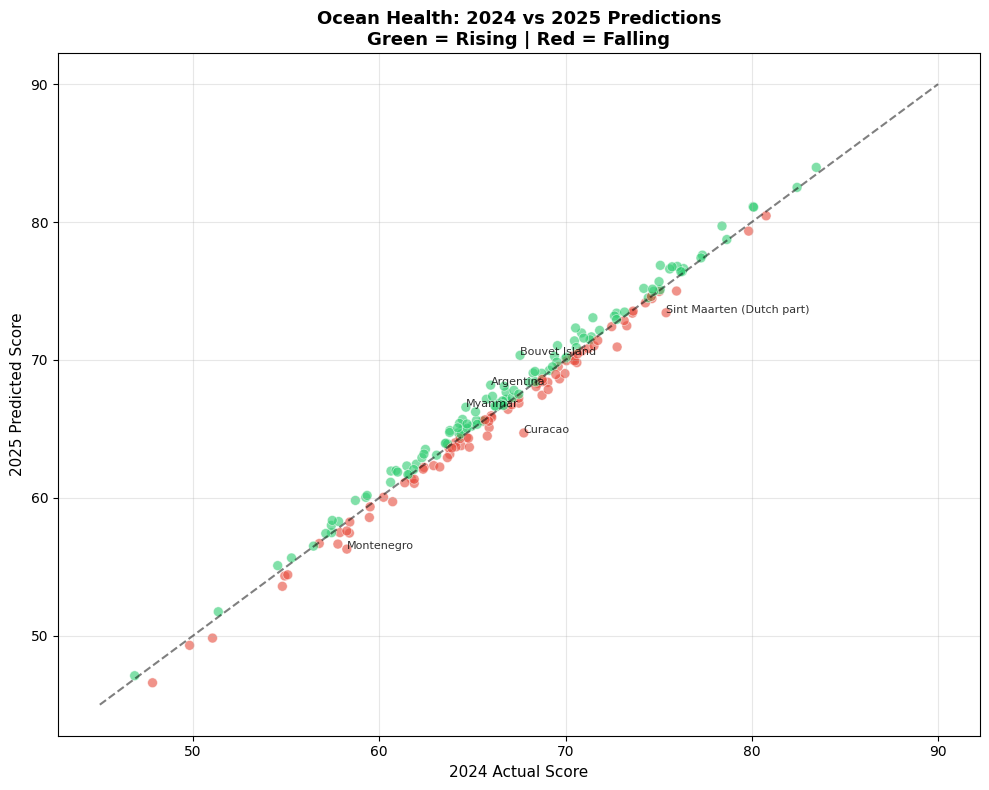


Predicted to RISE in 2025: 110 countries
Predicted to FALL in 2025: 83 countries

The ocean's future? Still more red than green.


In [26]:
# Scatter: 2024 Actual vs 2025 Predicted
fig, ax = plt.subplots(figsize=(10, 8))

colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in comp_df['ensemble_change']]
ax.scatter(comp_df['2024_actual'], comp_df['pred_ensemble'],
           c=colors, alpha=0.6, s=50, edgecolors='white', linewidth=0.5)

# No change line
ax.plot([45, 90], [45, 90], 'k--', alpha=0.5, linewidth=1.5)

# Label extremes
extremes = comp_df.nlargest(3, 'ensemble_change')['Country'].tolist() + \
           comp_df.nsmallest(3, 'ensemble_change')['Country'].tolist()

for idx, row in comp_df.iterrows():
    if row['Country'] in extremes:
        ax.annotate(row['Country'], (row['2024_actual'], row['pred_ensemble']),
                   fontsize=8, alpha=0.8)

ax.set_xlabel('2024 Actual Score', fontsize=11)
ax.set_ylabel('2025 Predicted Score', fontsize=11)
ax.set_title('Ocean Health: 2024 vs 2025 Predictions\nGreen = Rising | Red = Falling',
             fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary stats
rising = len(comp_df[comp_df['ensemble_change'] > 0])
falling = len(comp_df[comp_df['ensemble_change'] < 0])
print(f"\nPredicted to RISE in 2025: {rising} countries")
print(f"Predicted to FALL in 2025: {falling} countries")
print(f"\nThe ocean's future? Still more red than green.")

## Summary Dashboard

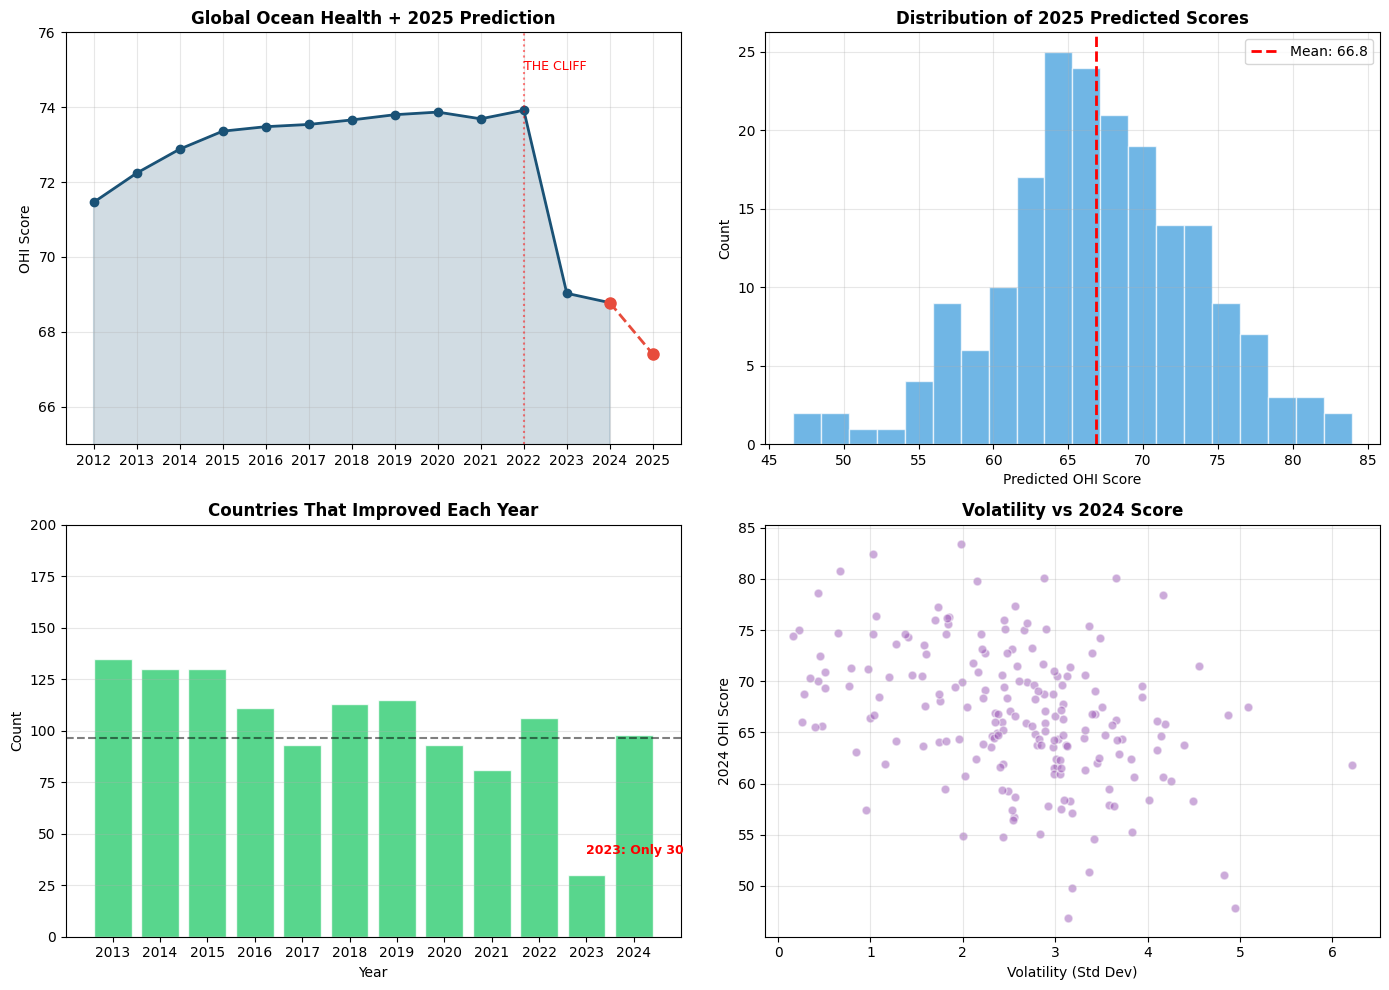


THE STORY IN 4 CHARTS:
--------------------------------------------------
1. Top-left: A decade of progress, then the cliff
2. Top-right: Most countries clustered around 65-75
3. Bottom-left: 2023 was a massacre — only 30 improved
4. Bottom-right: Volatile countries tend to end up worse


In [27]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Global trend with 2025 prediction
ax1 = axes[0, 0]
world_scores = df[df['REF_AREA'] == 'WLD'][year_cols].values[0].tolist()
world_scores_ext = world_scores + [world_2025_pred]
years_ext = year_cols + ['2025']
colors_line = ['#1a5276'] * 13 + ['#e74c3c']

ax1.plot(years_ext[:-1], world_scores_ext[:-1], 'o-', color='#1a5276', linewidth=2, markersize=6)
ax1.plot(years_ext[-2:], world_scores_ext[-2:], 'o--', color='#e74c3c', linewidth=2, markersize=8)
ax1.fill_between(years_ext[:-1], world_scores_ext[:-1], alpha=0.2, color='#1a5276')
ax1.set_title('Global Ocean Health + 2025 Prediction', fontweight='bold')
ax1.set_ylabel('OHI Score')
ax1.set_ylim(65, 76)
ax1.grid(True, alpha=0.3)
ax1.axvline(x='2022', color='red', linestyle=':', alpha=0.5)
ax1.text('2022', 75, 'THE CLIFF', fontsize=9, color='red')

# Plot 2: Distribution of 2025 predictions
ax2 = axes[0, 1]
ax2.hist(comp_df['pred_ensemble'], bins=20, color='#3498db', edgecolor='white', alpha=0.7)
ax2.axvline(x=comp_df['pred_ensemble'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {comp_df['pred_ensemble'].mean():.1f}")
ax2.set_title('Distribution of 2025 Predicted Scores', fontweight='bold')
ax2.set_xlabel('Predicted OHI Score')
ax2.set_ylabel('Count')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Winners vs Losers count by year
ax3 = axes[1, 0]
winners_by_year = []
for i in range(1, len(year_cols)):
    change = df_analysis[year_cols[i]].values - df_analysis[year_cols[i-1]].values
    winners = (change > 0).sum()
    winners_by_year.append(winners)

ax3.bar(year_cols[1:], winners_by_year, color='#2ecc71', edgecolor='white', alpha=0.8)
ax3.axhline(y=96.5, color='black', linestyle='--', alpha=0.5)  # half of 193
ax3.set_title('Countries That Improved Each Year', fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Count')
ax3.set_ylim(0, 200)
ax3.grid(True, alpha=0.3, axis='y')
ax3.text('2023', 40, '2023: Only 30', fontsize=9, color='red', fontweight='bold')

# Plot 4: Volatility vs Final Score
ax4 = axes[1, 1]
ax4.scatter(df_analysis['volatility'], df_analysis['2024'],
            alpha=0.5, s=40, c='#9b59b6', edgecolors='white')
ax4.set_title('Volatility vs 2024 Score', fontweight='bold')
ax4.set_xlabel('Volatility (Std Dev)')
ax4.set_ylabel('2024 OHI Score')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTHE STORY IN 4 CHARTS:")
print("-" * 50)
print("1. Top-left: A decade of progress, then the cliff")
print("2. Top-right: Most countries clustered around 65-75")
print("3. Bottom-left: 2023 was a massacre — only 30 improved")
print("4. Bottom-right: Volatile countries tend to end up worse")

# CONCLUSION: THE OCEAN HEALTH INDEX STORY (2012-2024)

THE GOOD NEWS (2012-2022):
--------------------------
Global ocean health climbed steadily from 71.5 to 73.9. Most years saw
100+ countries improving. Slow, quiet progress. The ocean was healing.


THE DISASTER (2023):
--------------------
Global score collapsed from 73.9 to 69.0 — a 4.9 point drop.
Only 30 out of 193 countries improved. A decade of progress erased
in 12 months. Aruba fell 11.5 points. Canada lost 13 over the decade.


THE PATTERNS:
-------------
- No region escaped: Europe -6.5, Asia -6.4, Americas -5.8, Oceania -6.2
- Stable countries (Australia, Taiwan, French Guiana) barely flinched
- Volatile countries (New Caledonia, Canada, Aruba) crashed hardest
- 2024 recovery was a coin flip: 78 bounced back, 80 kept falling


2025 PREDICTION:
----------------
Global score: 68.78 -> 67.41 (still falling)
Rising: Bouvet Island, Argentina, Myanmar, Bangladesh
Falling: Curacao, Montenegro, Sint Maarten, Caribbean islands


THE OPEN QUESTION:
------------------
What caused the 2023 cliff? Climate shock? Policy shift? Methodology change?
This dataset doesn't answer that. But something broke globally, and it
hit everyone — rich and poor, stable and volatile, north and south.


FINAL STAT:
-----------
Countries better off than 2012: 55 out of 193 (28%)
Countries worse off: 138 out of 193 (72%)

The ocean is losing. Slowly, then all at once.



---

# About Me & Let's Connect

---

### Hey, I'm Rekhi!

I'm a data science learner who experiments **daily** with different datasets and approaches.
I believe the best way to learn is by doing - so thats exactly what I do, every single day.

---


### A Honest Note About My Notebooks

Look, I'm gonna be real with you...

Not all my notebooks are perfect. Some are rough, some have typos, some experiments just didnt work out.
Time is limited and I prioritize **learning over perfection**.

If you spot mistakes, please let me know! I genuinely appreciate feedback.
I share the real journey - the wins AND the messy parts.


So if you find mistakes in my notebooks, please dont judge too harshly!
Drop a comment and let me know - I genuinely appreciate the feedback.


### Why I Share Everything (Even The Messy Stuff)

Some people ask why I post notebooks that arent "perfect". Heres my thinking:

1. **Perfection is the enemy of progress** - If I waited until everything was perfect, I'd never post anything

2. **Real learning is messy** - Polished tutorials hide the struggle. I want to show the real journey.

3. **Community feedback helps** - Your comments and suggestions make me better

4. **Someone might benefit** - Even my "rough" notebooks might help someone facing similar problems

5. **Accountability** - Posting daily keeps me consistent and motivated
---

### Find My Work

**Kaggle:** https://www.kaggle.com/seki32  
Daily notebooks, EDA, ML/DL experiments

**GitHub:** https://github.com/Rekhii  
All code and repositories

**Blog:** Coming Soon!

---

### Support This Work

If this helped you:

- **Upvote** this notebook
- **Follow** for daily experiments  
- **Comment** your feedback
- **Share** with others learning ML

---

### Your Support Motivates Me To:

- Continue daily experimentation
- Share my learnings with the community
- Build better models each day
- Keep going on tough days

---


Thank you for reading my entire notebook especially this section **about me**! It truly means a lot.  

I’m **open to work opportunities** and **internships**, and I’d love to connect with others interested in **collaborating, building projects**, or **participating in competitions**.  

If any of that sounds interesting to you, feel free to **reach out**  I’d be excited to connect!  
